In [ ]:
from manim import *
# from classes.electrodynamics_classes import *
import jupyter_capture_output

video_scene = " -v WARNING --disable_caching ampere_Scene"
image_scene = f" -v WARNING --disable_caching -r {2*427},{2*240}  -s ampere_Scene"

Manim Community v0.18.0.post0

Jupyter Capture Output v0.0.11


In [6]:
# main color of the animation (opposite of the background color)
# main_color = BLACK
# inverted_main_color = WHITE
# red_color = PURE_RED
# blue_color = PURE_BLUE
# grey_color = DARK_GREY

main_color = WHITE
inverted_main_color = BLACK
red_color = RED
blue_color = BLUE
grey_color = GREY

Output saved by creating file at animations/MX_4_Ampere/ampere_law.mp4.


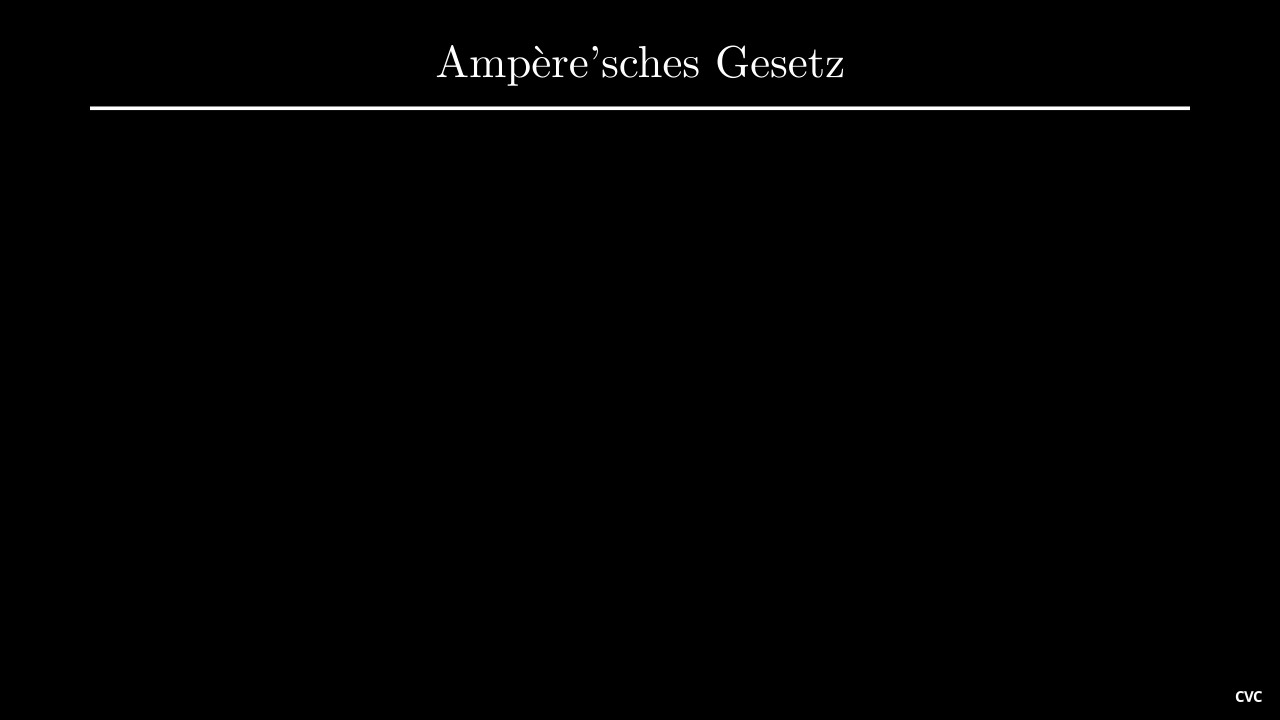

In [7]:
%%capture_video --path "animations/MX_4_Ampere/ampere_law.mp4"
%%manim -qm --fps 60 $video_scene


class ampere_Scene(Scene):
    def construct(self):
        CVC = Text('CVC', font_size = 12, weight = BOLD, color = main_color, font = 'Latin Modern Sans').align_on_border(RIGHT + DOWN, buff = 0.2)
        self.add(CVC)

        # headline
        headline = Title(r"Ampère'sches Gesetz", font_size = 48, color = main_color).align_on_border(UP + LEFT, buff = 0.5).shift(0.5 * RIGHT)
        self.add(headline)